# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]

## Create the model instance and sample

In [4]:
gm = GenerativeModel(region, model_data)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3395 seconds.


## Summarize Model Output

In [5]:
result = summarize_inference_data(gm.inference_data)

In [6]:
result.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-02,0.967536,0.966171,0.878591,1.022953,1023.233609,1237.934143,1187.683398,713,9528
2020-08-03,0.973064,0.972061,0.899667,1.044391,1016.067288,1233.512293,1263.262820,1804,22665
2020-08-04,0.976523,0.975404,0.891002,1.038600,1009.268763,1228.198569,1090.820707,1724,25084
2020-08-05,0.981560,0.980413,0.901092,1.049166,1003.266129,1222.153191,1077.976995,1691,24897
2020-08-06,0.988536,0.987156,0.907471,1.060083,998.198493,1215.535607,955.046641,1677,27869
2020-08-07,0.993613,0.993593,0.908890,1.067242,994.056963,1208.496137,1134.867627,1753,24516
2020-08-08,1.000693,1.000981,0.912488,1.085154,991.089815,1201.166814,1483.555181,762,8152
2020-08-09,1.003757,1.004835,0.909712,1.086508,989.314027,1193.654742,1268.934460,922,11532
2020-08-10,1.008211,1.005447,0.933809,1.112704,988.739754,1186.056445,1150.734815,1695,23378


## Plot Model Output

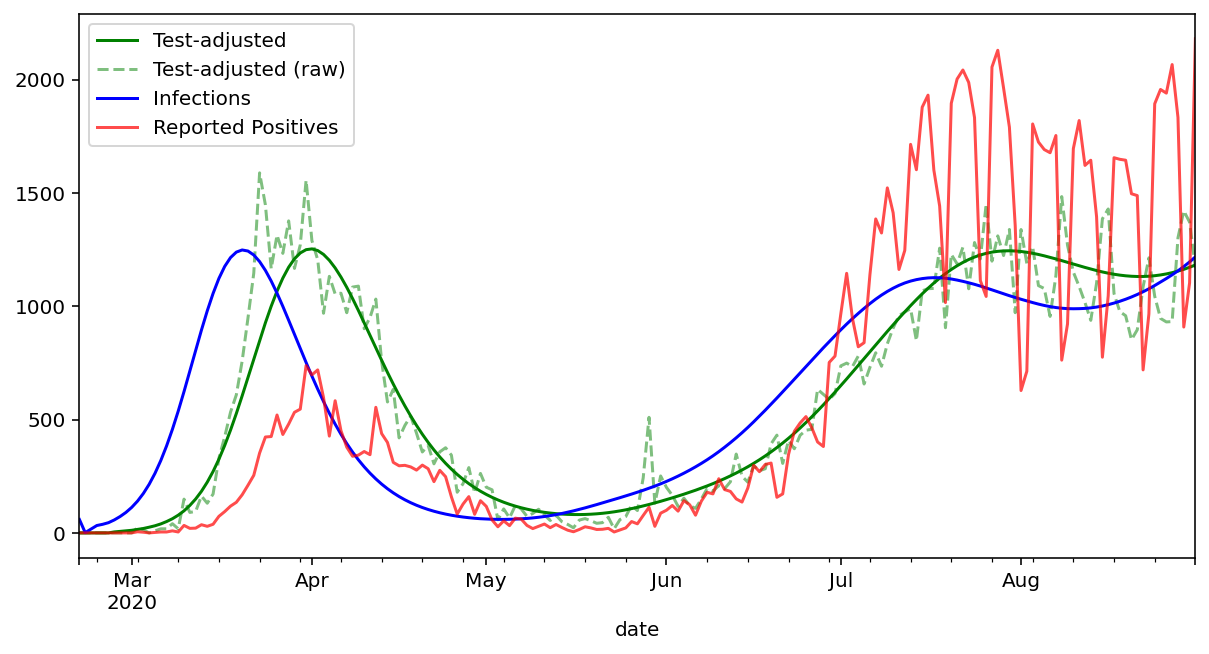

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

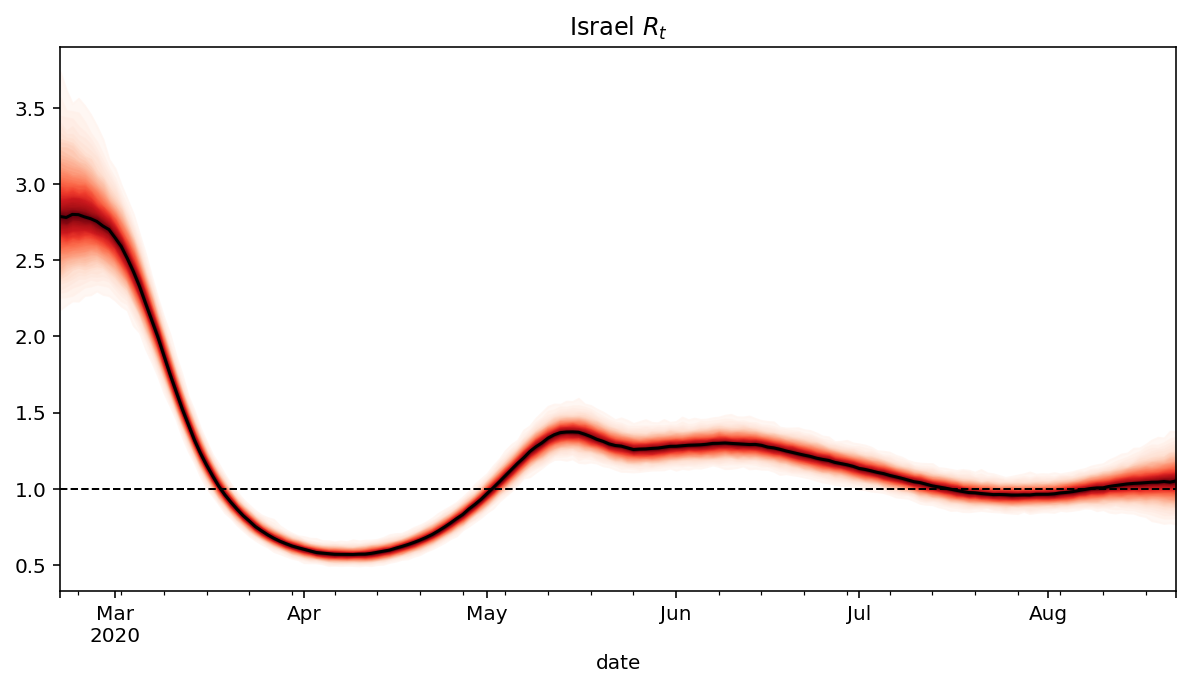

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')